# Data Preparation and Analysis

Importing libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Data Reading

In [ ]:
titanic_data = pd.read_csv('/content/EvenGroup_Dataset.csv')

titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


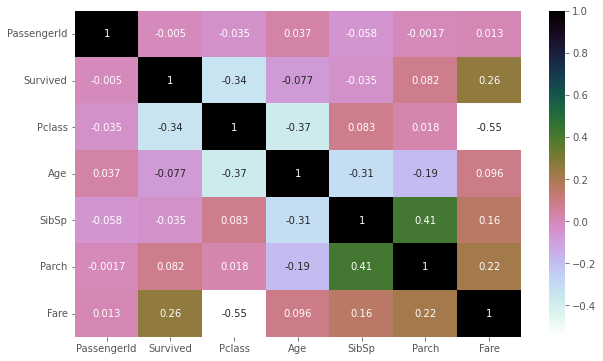

In [ ]:
plt.figure(figsize=(10,6))
sns.heatmap(titanic_data.corr(),annot=True,cmap='cubehelix_r')
plt.show()

Handling Missing Data

In [ ]:
# checking if null value exists or not
titanic_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

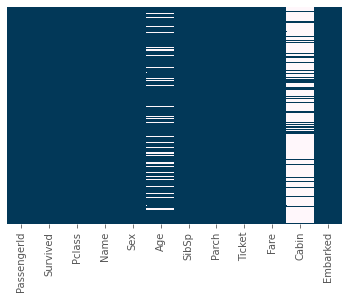

In [ ]:
# showing null values count using heatmap
sns.heatmap(titanic_data.isnull(), yticklabels=False, cbar=False, cmap='PuBu_r')

([<matplotlib.axis.XTick at 0x7fc947024e90>,
 [Text(0, 0, 'Dead'), Text(0, 0, 'Survived')])

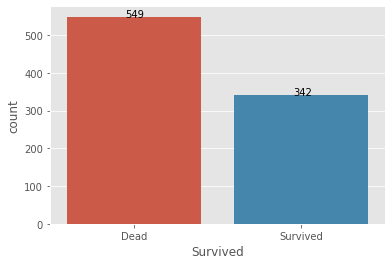

In [ ]:
# Displaying survival rate in countplot
ax = sns.countplot(x='Survived', data=titanic_data)
for i in ax.patches:
   ax.annotate('{:.0f}'.format(i.get_height()), (i.get_x()+0.35, i.get_height()+0.01))
plt.xticks((0, 1), ('Dead', 'Survived'))

([<matplotlib.axis.XTick at 0x7fc946f89050>,
 [Text(0, 0, 'Dead'), Text(0, 0, 'Survived')])

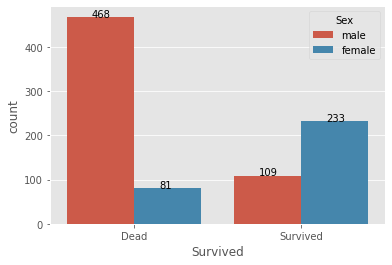

In [ ]:
# Displaying survival rate based on Sex
ax = sns.countplot(x='Survived', data=titanic_data, hue='Sex')
for i in ax.patches:
   ax.annotate('{:.0f}'.format(i.get_height()), (i.get_x()+0.15, i.get_height()+0.05))
plt.xticks((0, 1), ('Dead', 'Survived'))

([<matplotlib.axis.XTick at 0x7fc94701f890>,
 [Text(0, 0, 'Dead'), Text(0, 0, 'Survived')])

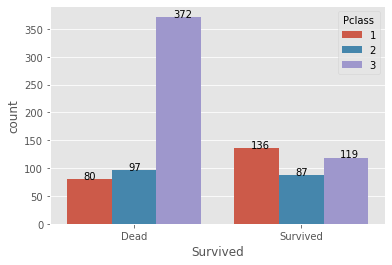

In [ ]:
# Displaying survival rate based on Pclass
ax = sns.countplot(x='Survived', data=titanic_data, hue='Pclass')
for i in ax.patches:
   ax.annotate('{:.0f}'.format(i.get_height()), (i.get_x()+0.1, i.get_height()+0.05))
plt.xticks((0, 1), ('Dead', 'Survived'))

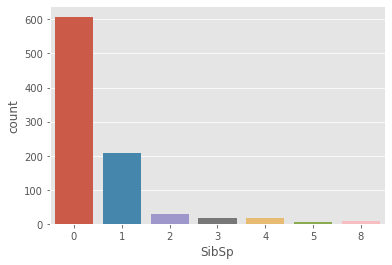

In [ ]:
# countplot for SibSp
sns.countplot(x='SibSp', data=titanic_data)

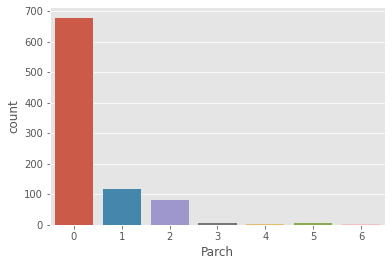

In [ ]:
# countplot for Parch
sns.countplot(x='Parch', data=titanic_data)

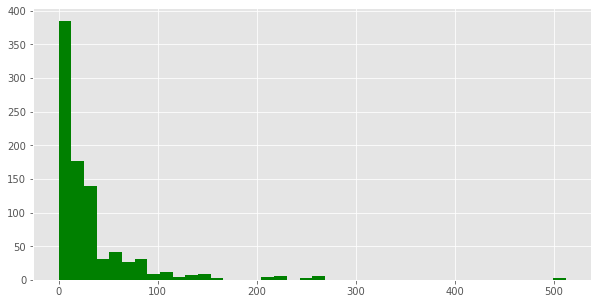

In [ ]:
# distribution plot for Fare
titanic_data['Fare'].hist(color='green', bins=40, figsize=(10,5))

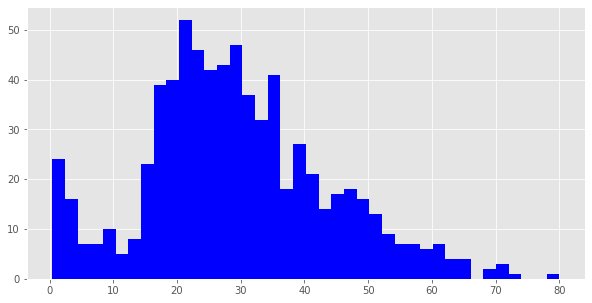

In [ ]:
# distribution plot for Age
titanic_data['Age'].hist(color='blue', bins=40, figsize=(10,5))

([<matplotlib.axis.XTick at 0x7fc946bda590>,
 [Text(0, 0, 'Dead'), Text(0, 0, 'Survived')])

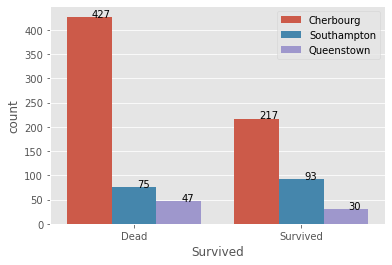

In [ ]:
# Displaying survival rate based on Embarkation
ax = sns.countplot(x='Survived', data=titanic_data, hue='Embarked')
ax.legend(labels = ['Cherbourg', 'Southampton', 'Queenstown'])
for i in ax.patches:
   ax.annotate('{:.0f}'.format(i.get_height()), (i.get_x()+0.15, i.get_height()+0.05))
plt.xticks((0, 1), ('Dead', 'Survived'))

# Cleaning Data

Handling missing data in Age column

In [ ]:
# Just want to know mean and median for Age group by Pclass
print('Mean for Age based on Pclass : \n', titanic_data.groupby(['Pclass'])['Age'].mean())
print('Median for Age based on Pclass : \n', titanic_data.groupby(['Pclass'])['Age'].median())

Mean for Age based on Pclass : 
 Pclass
1    38.233441
2    29.877630
3    25.140620
Name: Age, dtype: float64
Median for Age based on Pclass : 
 Pclass
1    37.0
2    29.0
3    24.0
Name: Age, dtype: float64


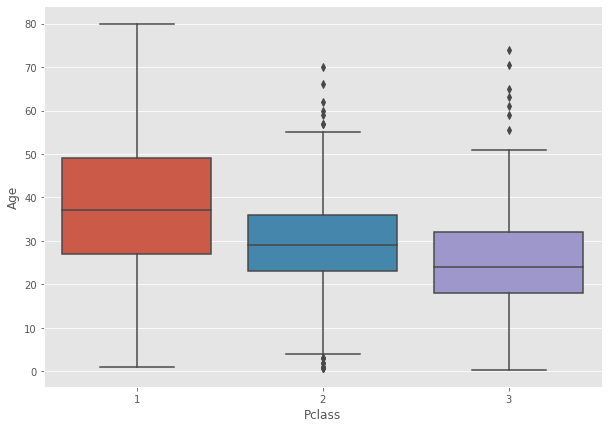

In [ ]:
# find correlation between Pclass and Age in order to handle missing values
plt.figure(figsize=(10, 7))
ax = sns.boxplot(x='Pclass', y='Age', data=titanic_data)

In [ ]:
# this function will replace null values in Age column with the values below based on Pclass
def impute_age(cols):
  Age = cols[0]
  Pclass = cols[1]

  if pd.isnull(Age):
    if Pclass == 1:
      return 37
    elif Pclass == 2:
      return 29
    else:
      return 24
  else:
    return Age

In [ ]:
titanic_data['Age'] = titanic_data[['Age', 'Pclass']].apply(impute_age, axis=1)

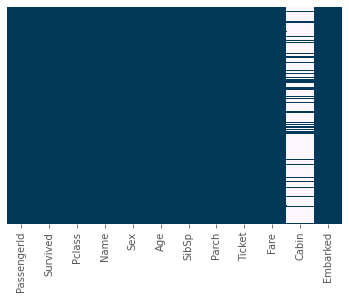

In [ ]:
# Visualize null values count in heatmap
sns.heatmap(titanic_data.isnull(), yticklabels=False, cbar=False, cmap='PuBu_r')

# Handling Categorical Data

In [ ]:
# Handling Sex categories
titanic_data['Sex'].replace(to_replace='male', value=1, inplace=True)
titanic_data['Sex'].replace(to_replace='female', value=0, inplace=True)

# Handling Embarked Column
titanic_data['Embarked'].replace(to_replace='C', value=0, inplace=True)
titanic_data['Embarked'].replace(to_replace='S', value=1, inplace=True)
titanic_data['Embarked'].replace(to_replace='Q', value=2, inplace=True)

In [ ]:
titanic_data.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1, inplace=True)
titanic_data.dropna(inplace=True)

titanic_data.isnull().sum()
titanic_data.head(10)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,1.0
1,1,1,0,38.0,1,0,71.2833,0.0
2,1,3,0,26.0,0,0,7.9250,1.0
3,1,1,0,35.0,1,0,53.1000,1.0
4,0,3,1,35.0,0,0,8.0500,1.0
5,0,3,1,24.0,0,0,8.4583,2.0
6,0,1,1,54.0,0,0,51.8625,1.0
7,0,3,1,2.0,3,1,21.0750,1.0
8,1,3,0,27.0,0,2,11.1333,1.0
9,1,2,0,14.0,1,0,30.0708,0.0


# Train Test Split

In [ ]:
titanic_data.drop('Survived', axis=1).head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,22.0,1,0,7.2500,1.0
1,1,0,38.0,1,0,71.2833,0.0
2,3,0,26.0,0,0,7.9250,1.0
3,1,0,35.0,1,0,53.1000,1.0
4,3,1,35.0,0,0,8.0500,1.0


In [ ]:
from sklearn.model_selection import train_test_split

X = titanic_data.drop('Survived', axis=1)
y = titanic_data['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0)

In [ ]:
# Printing accuracy for every model

# Logistic Regression
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
logreg_acc = logreg.score(X_train, y_train)*100

# SVC
from sklearn.svm import SVC
svc = SVC(gamma='auto', probability=True)
svc.fit(X_train, y_train)
svc_acc = svc.score(X_train, y_train)*100

# Gaussian Naive Bayes
from sklearn.naive_bayes import GaussianNB
gauss_nb = GaussianNB()
gauss_nb.fit(X_train, y_train)
gauss_nb_acc = gauss_nb.score(X_train, y_train)*100

# KNN
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
knn_acc = knn.score(X_train, y_train)*100

# Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
rand_forest = RandomForestClassifier()
rand_forest.fit(X_train, y_train)
rand_forest_acc = rand_forest.score(X_train, y_train)*100


# models = pd.DataFrame({
#     'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 'Random Forest', 'Naive Bayes'],
#     'Score': [svc_acc, knn_acc, logreg_acc, rand_forest_acc, gauss_nb_acc]})
# models.sort_values(by='Score', ascending=False)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


# Every model visualization

Random Forest: 0.808723 (0.028126)
Logistic Regression: 0.824774 (0.017765)
KNN: 0.709097 (0.033451)
Gaussian NB: 0.800658 (0.014462)


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


SVM: 0.683329 (0.041773)


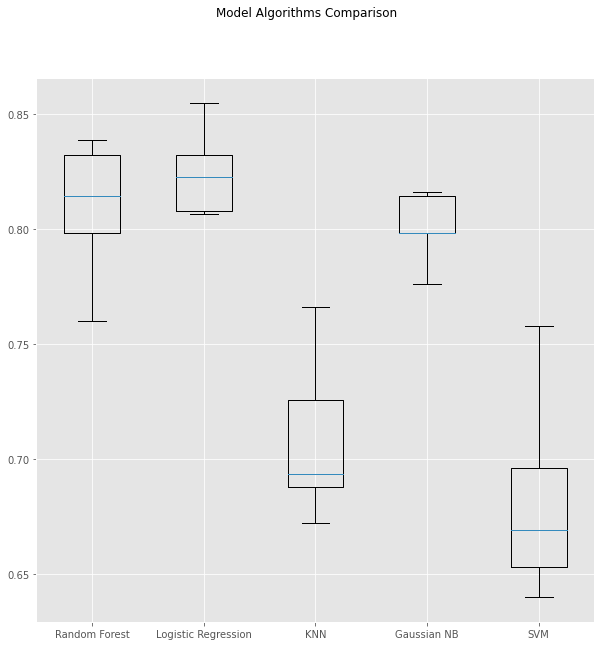

In [ ]:
# Model comparison using boxplot
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn import datasets
import matplotlib.pyplot as plt

plt.style.use('ggplot')
seed = 50

models = []
models.append(('Random Forest', RandomForestClassifier()))
models.append(('Logistic Regression', LogisticRegression()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('Gaussian NB', GaussianNB()))
models.append(('SVM', SVC()))

results = []
names = []
scoring = 'accuracy'

for name, model in models:
         kfold = model_selection.KFold(n_splits=5, shuffle=True, random_state=90210)
         cv_results = model_selection.cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
         results.append(cv_results)
         names.append(name)
         msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
         print(msg)

fig = plt.figure(figsize=(10,10))
fig.suptitle('Model Algorithms Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

Random Forest model

In [ ]:
# Using Random Forest model
y_pred_randomforest = rand_forest.predict(X_test)

Text(0.5, 15.0, 'Predicted label')

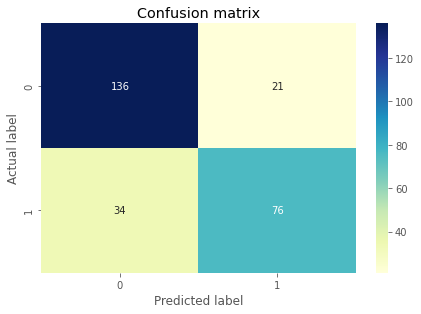

In [ ]:
from sklearn import metrics

confuse_matrix = metrics.confusion_matrix(y_test, y_pred_randomforest)

sns.heatmap(pd.DataFrame(confuse_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [ ]:
from sklearn.metrics import accuracy_score

print("Accuracy:",metrics.accuracy_score(y_test, y_pred_randomforest))
print("Precision:",metrics.precision_score(y_test, y_pred_randomforest))
print("Recall:",metrics.recall_score(y_test, y_pred_randomforest))

Accuracy: 0.7940074906367042
Precision: 0.7835051546391752
Recall: 0.6909090909090909


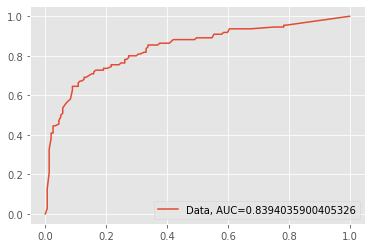

              precision    recall  f1-score   support

           0       0.80      0.87      0.83       157
           1       0.78      0.69      0.73       110

    accuracy                           0.79       267
   macro avg       0.79      0.78      0.78       267
weighted avg       0.79      0.79      0.79       267

Sensitivity :  0.8662420382165605
Specificity :  0.6909090909090909


In [ ]:
# Displaying Area Under Curve
y_pred_proba = rand_forest.predict_proba(X_test)[::, 1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="Data, AUC="+str(auc))
plt.legend(loc=4)
plt.show()

# Classification Report
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_randomforest))

# Sensitivity
sens_rf = confuse_matrix[0,0]/(confuse_matrix[0,0]+confuse_matrix[0,1])
print('Sensitivity : ', sens_rf)

# Specificity
spec_rf = confuse_matrix[1,1]/(confuse_matrix[1,0]+confuse_matrix[1,1])
print('Specificity : ', spec_rf)

Logistic Regression

In [ ]:
# Using Logistic Regression model
y_pred = logreg.predict(X_test)

Text(0.5, 15.0, 'Predicted label')

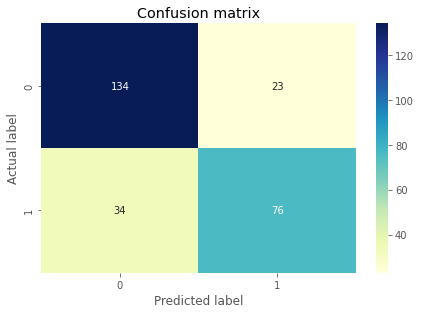

In [ ]:
from sklearn import metrics

confuse_matrix = metrics.confusion_matrix(y_test, y_pred)

sns.heatmap(pd.DataFrame(confuse_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [ ]:
from sklearn.metrics import accuracy_score

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.7865168539325843
Precision: 0.7676767676767676
Recall: 0.6909090909090909


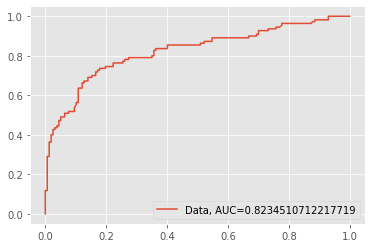

              precision    recall  f1-score   support

           0       0.80      0.85      0.82       157
           1       0.77      0.69      0.73       110

    accuracy                           0.79       267
   macro avg       0.78      0.77      0.78       267
weighted avg       0.79      0.79      0.78       267

Sensitivity :  0.8535031847133758
Specificity :  0.6909090909090909


In [ ]:
# Displaying Area Under Curve
y_pred_proba = logreg.predict_proba(X_test)[::, 1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="Data, AUC="+str(auc))
plt.legend(loc=4)
plt.show()

# Classification Report
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

# Sensitivity
sens_logreg = confuse_matrix[0,0]/(confuse_matrix[0,0]+confuse_matrix[0,1])
print('Sensitivity : ', sens_logreg)

# Specificity
spec_logreg = confuse_matrix[1,1]/(confuse_matrix[1,0]+confuse_matrix[1,1])
print('Specificity : ', spec_logreg)

Gaussian Naive Bayes

In [ ]:
# Using Gaussian NB model
y_pred = gauss_nb.predict(X_test)

Text(0.5, 15.0, 'Predicted label')

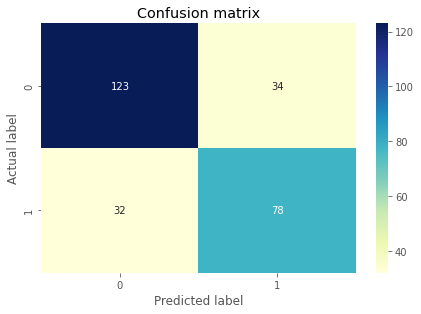

In [ ]:
from sklearn import metrics

confuse_matrix = metrics.confusion_matrix(y_test, y_pred)

sns.heatmap(pd.DataFrame(confuse_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [ ]:
from sklearn.metrics import accuracy_score

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.7528089887640449
Precision: 0.6964285714285714
Recall: 0.7090909090909091


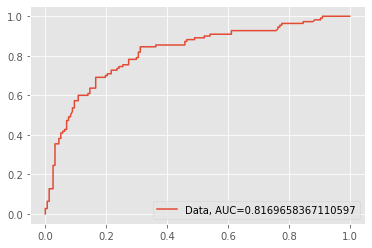

              precision    recall  f1-score   support

           0       0.79      0.78      0.79       157
           1       0.70      0.71      0.70       110

    accuracy                           0.75       267
   macro avg       0.74      0.75      0.75       267
weighted avg       0.75      0.75      0.75       267

Sensitivity :  0.7834394904458599
Specificity :  0.7090909090909091


In [ ]:
# Displaying Area Under Curve
y_pred_proba = gauss_nb.predict_proba(X_test)[::, 1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="Data, AUC="+str(auc))
plt.legend(loc=4)
plt.show()

# Classification Report
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

# Sensitivity
sens_nb = confuse_matrix[0,0]/(confuse_matrix[0,0]+confuse_matrix[0,1])
print('Sensitivity : ', sens_nb)

# Specificity
spec_nb = confuse_matrix[1,1]/(confuse_matrix[1,0]+confuse_matrix[1,1])
print('Specificity : ', spec_nb)

K-Nearest Neighbors

In [ ]:
# Using KNN model
y_pred = knn.predict(X_test)

Text(0.5, 15.0, 'Predicted label')

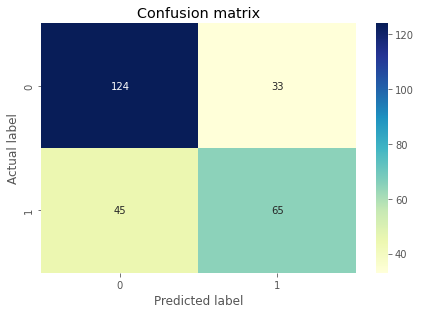

In [ ]:
from sklearn import metrics

confuse_matrix = metrics.confusion_matrix(y_test, y_pred)

sns.heatmap(pd.DataFrame(confuse_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [ ]:
from sklearn.metrics import accuracy_score

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.7078651685393258
Precision: 0.6632653061224489
Recall: 0.5909090909090909


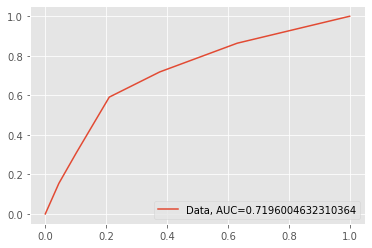

              precision    recall  f1-score   support

           0       0.73      0.79      0.76       157
           1       0.66      0.59      0.62       110

    accuracy                           0.71       267
   macro avg       0.70      0.69      0.69       267
weighted avg       0.70      0.71      0.70       267

Sensitivity :  0.7898089171974523
Specificity :  0.5909090909090909


In [ ]:
# Displaying Area Under Curve
y_pred_proba = knn.predict_proba(X_test)[::, 1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="Data, AUC="+str(auc))
plt.legend(loc=4)
plt.show()

# Classification Report
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

# Sensitivity
sens_knn = confuse_matrix[0,0]/(confuse_matrix[0,0]+confuse_matrix[0,1])
print('Sensitivity : ', sens_knn)

# Specificity
spec_knn = confuse_matrix[1,1]/(confuse_matrix[1,0]+confuse_matrix[1,1])
print('Specificity : ', spec_knn)

Support Vector Machine (SVM)

In [ ]:
# Using SVC model
y_pred = svc.predict(X_test)

Text(0.5, 15.0, 'Predicted label')

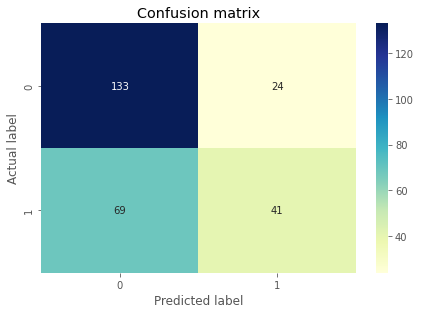

In [ ]:
from sklearn import metrics

confuse_matrix = metrics.confusion_matrix(y_test, y_pred)

sns.heatmap(pd.DataFrame(confuse_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [ ]:
from sklearn.metrics import accuracy_score

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.651685393258427
Precision: 0.6307692307692307
Recall: 0.37272727272727274


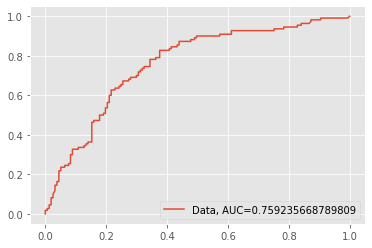

              precision    recall  f1-score   support

           0       0.66      0.85      0.74       157
           1       0.63      0.37      0.47       110

    accuracy                           0.65       267
   macro avg       0.64      0.61      0.60       267
weighted avg       0.65      0.65      0.63       267

Sensitivity :  0.8471337579617835
Specificity :  0.37272727272727274


In [ ]:
# Displaying Area Under Curve
y_pred_proba = svc.predict_proba(X_test)[::, 1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="Data, AUC="+str(auc))
plt.legend(loc=4)
plt.show()

# Classification Report
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

# Sensitivity
sens_svc = confuse_matrix[0,0]/(confuse_matrix[0,0]+confuse_matrix[0,1])
print('Sensitivity : ', sens_svc)

# Specificity
spec_svc = confuse_matrix[1,1]/(confuse_matrix[1,0]+confuse_matrix[1,1])
print('Specificity : ', spec_svc)

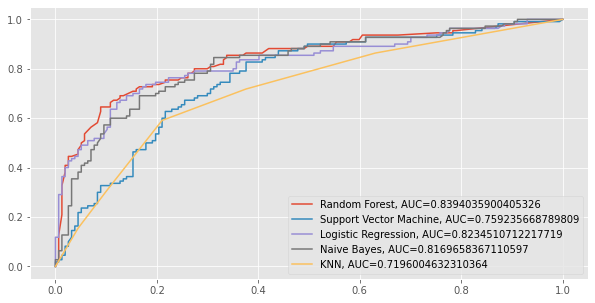

In [ ]:
# Comparing ROC Curve for every model

# Random Forest
y_pred_rf = rand_forest.predict_proba(X_test)[::, 1]
fpr_rf, tpr_rf, _ = metrics.roc_curve(y_test,  y_pred_rf)
auc_rf = metrics.roc_auc_score(y_test, y_pred_rf)

# Support Vector Machine
y_pred_svc = svc.predict_proba(X_test)[::, 1]
fpr_svc, tpr_svc, _ = metrics.roc_curve(y_test,  y_pred_svc)
auc_svc = metrics.roc_auc_score(y_test, y_pred_svc)

# Logistic Regression
y_pred_logreg = logreg.predict_proba(X_test)[::, 1]
fpr_logreg, tpr_logreg, _ = metrics.roc_curve(y_test,  y_pred_logreg)
auc_logreg = metrics.roc_auc_score(y_test, y_pred_logreg)

# Gaussion Naive Bayes
y_pred_nb = gauss_nb.predict_proba(X_test)[::, 1]
fpr_nb, tpr_nb, _ = metrics.roc_curve(y_test,  y_pred_nb)
auc_nb = metrics.roc_auc_score(y_test, y_pred_nb)

# KNN
y_pred_knn = knn.predict_proba(X_test)[::, 1]
fpr_knn, tpr_knn, _ = metrics.roc_curve(y_test,  y_pred_knn)
auc_knn = metrics.roc_auc_score(y_test, y_pred_knn)

plt.figure(figsize=(10,5))
plt.plot(fpr_rf, tpr_rf, label='Random Forest, AUC='+str(auc_rf))
plt.plot(fpr_svc,tpr_svc, label='Support Vector Machine, AUC='+str(auc_svc))
plt.plot(fpr_logreg, tpr_logreg, label='Logistic Regression, AUC='+str(auc_logreg))
plt.plot(fpr_nb, tpr_nb, label='Naive Bayes, AUC='+str(auc_nb))
plt.plot(fpr_knn, tpr_knn, label='KNN, AUC='+str(auc_knn))
plt.legend(loc=4)
plt.show()

In [ ]:
y_pred_randomforest

array([1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1,
       1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1,
       1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 1])